## Loan_amount Prediction

#### to predict the maximum loan_amount that can be granted to the customer.

#### Importing neccessary libraries

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [158]:
data=pd.read_csv('E:/ML projects/18.Calculating credit worthiness for rural india/dataset/trainingData .csv')

In [159]:
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [160]:
data.shape

(40000, 21)

In [161]:
data.columns

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [163]:
data.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


#### checking for null values

In [164]:
data.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [165]:
#Calculating missing value in percentage
(data.isnull().sum()/40000)*100

Id                        0.0000
city                      4.6600
age                       0.0000
sex                       0.0000
social_class             13.1375
primary_business          0.0650
secondary_business       13.1025
annual_income             0.0000
monthly_expenses          0.3000
old_dependents            0.0000
young_dependents          0.0000
home_ownership            0.9475
type_of_house             1.7350
occupants_count           0.0000
house_area                0.0000
sanitary_availability     0.5200
water_availabity         13.1325
loan_purpose              0.0650
loan_tenure               0.0000
loan_installments         0.0000
loan_amount               0.0000
dtype: float64

In [166]:
numerical_col=[col for col in data.columns if data[col].dtype!='O']

#### Correlation

In [167]:
data[numerical_col].corr()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
Id,1.000000,-0.004114,0.472447,-0.021413,0.044053,0.109523,0.095202,0.007440,0.037266,0.003357,0.433107,-0.062596,-0.225166,0.141249
age,-0.004114,1.000000,-0.006414,-0.003101,-0.000691,-0.005837,0.000937,-0.000031,-0.000586,-0.007487,-0.001627,-0.000233,-0.003040,-0.001969
annual_income,0.472447,-0.006414,1.000000,0.112499,0.062216,0.239864,0.011885,0.003999,0.033902,0.241509,0.280939,-0.027618,-0.119936,0.085632
monthly_expenses,-0.021413,-0.003101,0.112499,1.000000,-0.003522,0.028754,-0.047173,0.001320,-0.008270,0.059819,0.078061,-0.013020,0.113914,0.019569
old_dependents,0.044053,-0.000691,0.062216,-0.003522,1.000000,-0.093778,0.008586,-0.000987,0.010852,0.029027,-0.017931,-0.022390,-0.033921,0.006997
young_dependents,0.109523,-0.005837,0.239864,0.028754,-0.093778,1.000000,0.025205,0.004192,0.017877,0.227446,-0.025687,-0.015778,-0.064783,0.006200
home_ownership,0.095202,0.000937,0.011885,-0.047173,0.008586,0.025205,1.000000,0.000867,0.009548,0.040946,0.018611,-0.098331,0.021205,0.001939
occupants_count,0.007440,-0.000031,0.003999,0.001320,-0.000987,0.004192,0.000867,1.000000,-0.000263,0.003550,0.005204,-0.000133,-0.002887,-0.000125
house_area,0.037266,-0.000586,0.033902,-0.008270,0.010852,0.017877,0.009548,-0.000263,1.000000,0.040755,0.001440,0.001177,-0.027506,0.002874
sanitary_availability,0.003357,-0.007487,0.241509,0.059819,0.029027,0.227446,0.040946,0.003550,0.040755,1.000000,0.141974,0.007674,0.175375,0.042241


#### Exploratory Data Analysis

In [168]:

# Personal Details: city, age, sex, social_class
personal_data=pd.DataFrame(data,columns=["city","age","sex","social_class"])
personal_data.head()


,city,age,sex,social_class
0,Dhanbad,22,F,Mochi
1,Manjapra,21,F,OBC
2,Dhanbad,24,M,Nai
3,NaN,26,F,OBC
4,Nuapada,23,F,OBC


In [169]:

personal_data.describe()

,age
count,40000.00000
mean,55.15990
std,3830.35566
min,2.00000
25%,29.00000
50%,35.00000
75%,42.00000
max,766105.00000


In [170]:

personal_data.isnull().sum()

city            1864
age                0
sex                0
social_class    5255
dtype: int64

<Axes: >

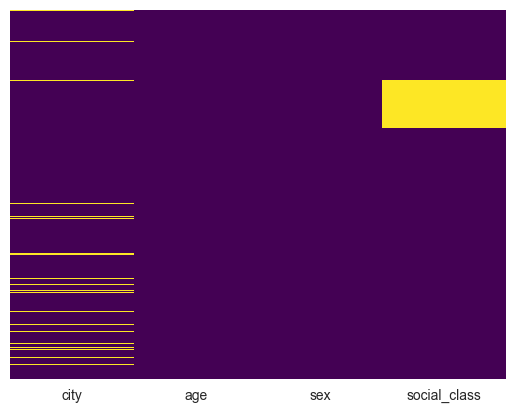

In [171]:

sns.heatmap(personal_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [172]:
personal_data.count()

city            38136
age             40000
sex             40000
social_class    34745
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

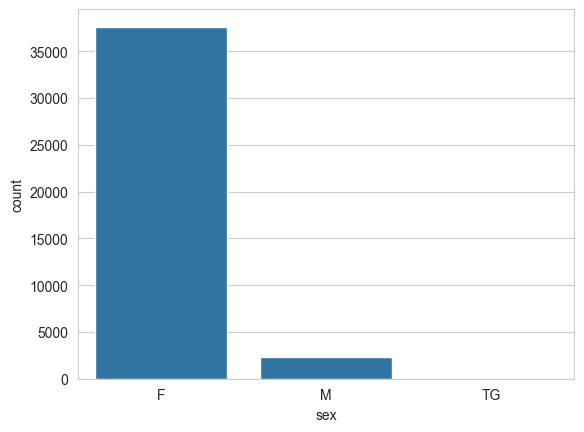

In [173]:
#categorical features
sns.set_style('whitegrid')
sns.countplot(x='sex',data=personal_data)

In [174]:

data1=personal_data[(personal_data['sex']=="M")].count()
data1.head()

city            2193
age             2371
sex             2371
social_class    2278
dtype: int64

In [175]:

data1=personal_data[(personal_data['sex']=="F")].count()
data1.head()

city            35938
age             37622
sex             37622
social_class    32460
dtype: int64

In [176]:
data1=personal_data[(personal_data['sex']=="TG")].count()
data1.head()

city            5
age             7
sex             7
social_class    7
dtype: int64


#### Handling Missing value

In [177]:
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [178]:

#Since in age features ,we have one record of 205,288 and 766105
#these are some kind of outliers and 788105 are mistyped age value.
#I am dropping these values as we have only 3 records.
data_outlier1=data.loc[data['age']==205]
data_outlier2=data.loc[data['age']==288]
data_outlier3=data.loc[data['age']==766105]

In [179]:

i = data[(data.age ==205)].index
j=data[(data.age==288)].index
k=data[(data.age==766105)].index

In [180]:

#deleting three records
data_updated1=data.drop(i)
data_updated2=data.drop(j)
data_updated2=data.drop(k)

In [181]:

data_updated2.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [182]:

data_updated3=data_updated2.copy()

In [183]:

data_updated3.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [184]:
#Handling missing values with mean and mode
data_updated3['social_class']=data_updated3['social_class'].fillna(data_updated3['social_class'].mode()[0])
data_updated3['city']=data_updated3['city'].fillna(data_updated3['city'].mode()[0])
data_updated3['primary_business']=data_updated3['primary_business'].fillna(data_updated3['primary_business'].mode()[0])
data_updated3['secondary_business']=data_updated3['secondary_business'].fillna(data_updated3['secondary_business'].mode()[0])
data_updated3['type_of_house']=data_updated3['type_of_house'].fillna(data_updated3['type_of_house'].mode()[0])
data_updated3['sanitary_availability']=data_updated3['sanitary_availability'].fillna(data_updated3['sanitary_availability'].mode()[0])                                                      
data_updated3['water_availabity']=data_updated3['water_availabity'].fillna(data_updated3['water_availabity'].mode()[0])
data_updated3['loan_purpose']=data_updated3['loan_purpose'].fillna(data_updated3['loan_purpose'].mode()[0])
data_updated3['monthly_expenses']=data_updated3['monthly_expenses'].fillna(data_updated3['monthly_expenses'].mean())
data_updated3['home_ownership']=data_updated3['home_ownership'].fillna(data_updated3['home_ownership'].mode()[0])

In [185]:

data_updated3.isnull().sum()

Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [186]:
data_updated3.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [187]:

data_updated3.shape

(39999, 21)

In [188]:

X=data_updated3.iloc[:, 1:20]
X.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12
3,Pusad,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12


In [189]:
X.shape

(39999, 19)

In [190]:

y=data_updated3.iloc[:,-1] 
y.head()

0    5000.0
1    7500.0
2    5000.0
3    7500.0
4    5000.0
Name: loan_amount, dtype: float64

In [191]:
data_X=pd.DataFrame(data_updated3,columns=["Id","age","sex","annual_income",
                                     "monthly_expenses","old_dependents","young_dependents","home_ownership","type_of_house",
                                     "occupants_count","house_area","loan_tenure","loan_installments"])

In [192]:
data_X.head()

,Id,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_tenure,loan_installments
0,1,22,F,36000.0,5000.0,0,2,1.0,R,4,70.0,12,12
1,2,21,F,94000.0,3600.0,1,1,1.0,T1,4,80.0,12,50
2,3,24,M,48000.0,4000.0,0,2,1.0,T1,4,50.0,12,12
3,4,26,F,7000.0,5000.0,0,2,1.0,T1,5,50.0,12,50
4,5,23,F,36000.0,3500.0,0,0,1.0,T1,1,112.0,12,12


In [193]:

data1=pd.DataFrame(data_X,columns=["type_of_house","sex"])
data2= pd.get_dummies(data1.type_of_house,prefix='type_of_house',drop_first=True)

In [194]:
#performing one hot encoding on the feature CourseInstructor
data3 = pd.get_dummies(data1.sex, prefix='sex',drop_first=True)

In [195]:

data6= pd.concat([data2, data3],axis=1)
data6.head()

,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,False,False,False,False
1,True,False,False,False
2,True,False,True,False
3,True,False,False,False
4,True,False,False,False


In [196]:

data7= pd.concat([data_X, data6],axis=1)
data7.head()

,Id,age,sex,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,loan_tenure,loan_installments,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,1,22,F,36000.0,5000.0,0,2,1.0,R,4,70.0,12,12,False,False,False,False
1,2,21,F,94000.0,3600.0,1,1,1.0,T1,4,80.0,12,50,True,False,False,False
2,3,24,M,48000.0,4000.0,0,2,1.0,T1,4,50.0,12,12,True,False,True,False
3,4,26,F,7000.0,5000.0,0,2,1.0,T1,5,50.0,12,50,True,False,False,False
4,5,23,F,36000.0,3500.0,0,0,1.0,T1,1,112.0,12,12,True,False,False,False


In [197]:
X=pd.DataFrame(data7,columns=["old_dependents","loan_installments","loan_tenure","home_ownership",
                       "young_dependents","monthly_expenses","annual_income","age","house_area","Id",
                       "occupants_count","type_of_house_T1","type_of_house_T2","sex_M","sex_TG"])

In [198]:
X.head()

,old_dependents,loan_installments,loan_tenure,home_ownership,young_dependents,monthly_expenses,annual_income,age,house_area,Id,occupants_count,type_of_house_T1,type_of_house_T2,sex_M,sex_TG
0,0,12,12,1.0,2,5000.0,36000.0,22,70.0,1,4,False,False,False,False
1,1,50,12,1.0,1,3600.0,94000.0,21,80.0,2,4,True,False,False,False
2,0,12,12,1.0,2,4000.0,48000.0,24,50.0,3,4,True,False,True,False
3,0,50,12,1.0,2,5000.0,7000.0,26,50.0,4,5,True,False,False,False
4,0,12,12,1.0,0,3500.0,36000.0,23,112.0,5,1,True,False,False,False


In [199]:
X.shape

(39999, 15)

In [200]:
X.isnull().sum()

old_dependents       0
loan_installments    0
loan_tenure          0
home_ownership       0
young_dependents     0
monthly_expenses     0
annual_income        0
age                  0
house_area           0
Id                   0
occupants_count      0
type_of_house_T1     0
type_of_house_T2     0
sex_M                0
sex_TG               0
dtype: int64

In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39999 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   old_dependents     39999 non-null  int64  
 1   loan_installments  39999 non-null  int64  
 2   loan_tenure        39999 non-null  int64  
 3   home_ownership     39999 non-null  float64
 4   young_dependents   39999 non-null  int64  
 5   monthly_expenses   39999 non-null  float64
 6   annual_income      39999 non-null  float64
 7   age                39999 non-null  int64  
 8   house_area         39999 non-null  float64
 9   Id                 39999 non-null  int64  
 10  occupants_count    39999 non-null  int64  
 11  type_of_house_T1   39999 non-null  bool   
 12  type_of_house_T2   39999 non-null  bool   
 13  sex_M              39999 non-null  bool   
 14  sex_TG             39999 non-null  bool   
dtypes: bool(4), float64(4), int64(7)
memory usage: 3.8 MB


In [202]:
X.describe()

,old_dependents,loan_installments,loan_tenure,home_ownership,young_dependents,monthly_expenses,annual_income,age,house_area,Id,occupants_count
count,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,3.999900e+04,39999.000000,39999.000000,39999.000000,39999.000000
mean,0.044901,21.761419,12.032226,0.972749,1.137128,3810.945886,3.764116e+04,36.008175,552.818570,20000.744094,26.641666
std,0.222005,16.682595,1.367490,0.162815,1.073838,4586.099016,2.873886e+04,9.054323,4596.978538,11547.190867,4750.054861
min,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000e+00,2.000000,0.000000,1.000000,0.000000
25%,0.000000,12.000000,12.000000,1.000000,0.000000,2600.000000,1.440000e+04,29.000000,200.000000,10000.500000,2.000000
50%,0.000000,12.000000,12.000000,1.000000,1.000000,3500.000000,3.600000e+04,35.000000,400.000000,20001.000000,3.000000
75%,0.000000,50.000000,12.000000,1.000000,2.000000,4000.000000,5.600000e+04,42.000000,600.000000,30000.500000,4.000000
max,3.000000,84.000000,84.000000,1.000000,7.000000,240000.000000,1.200000e+06,288.000000,700000.000000,40000.000000,950000.000000


In [203]:

y=pd.DataFrame(data_updated3,columns=["loan_amount"])

In [204]:
y.shape

(39999, 1)

#### Splitting the data for training and testing

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### Linear Regression

In [208]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [209]:
prediction=regressor.predict(X_test)

In [211]:
data_prediction=pd.DataFrame(prediction,columns=["Predicted_loan_amount"])
data_prediction.head()

,Predicted_loan_amount
0,10380.555641
1,8926.324495
2,6498.833450
3,6852.023718
4,13855.366120


In [212]:
data_prediction.shape

(12000, 1)

In [213]:
y_test.shape

(12000, 1)

In [214]:
y_test.head()

,loan_amount
26915,14000.0
23103,10000.0
15212,8000.0
8556,5000.0
38708,12000.0


In [215]:

y_test1=y_test.copy()

In [217]:

y_test1=y_test1.reset_index()
y_test2=pd.DataFrame(y_test1,columns=["loan_amount"])
y_test2.head()

,loan_amount
0,14000.0
1,10000.0
2,8000.0
3,5000.0
4,12000.0


In [218]:
df_row_merged = pd.concat([data_prediction,y_test2],axis=1)
df_row_merged.head(10)

,Predicted_loan_amount,loan_amount
0,10380.555641,14000.0
1,8926.324495,10000.0
2,6498.833450,8000.0
3,6852.023718,5000.0
4,13855.366120,12000.0
5,9096.416004,8000.0
6,9787.808675,9000.0
7,7569.995216,5000.0
8,10618.812888,8000.0
9,7154.695748,5000.0


<Axes: >

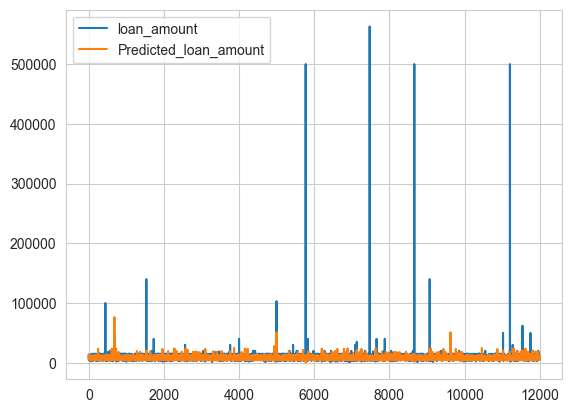

In [219]:

df_row_merged[['loan_amount','Predicted_loan_amount']].plot()

In [225]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2229.615007231517
MSE: 97518065.09028986
RMSE: 9875.123548102569


In [221]:
#df_row_merged_randomforest.head()
df_row_merged['error_rate']=(abs(df_row_merged['loan_amount']-df_row_merged['Predicted_loan_amount'])/df_row_merged['loan_amount'])*100

In [222]:

df_row_merged.head()

,Predicted_loan_amount,loan_amount,error_rate
0,10380.555641,14000.0,25.853174
1,8926.324495,10000.0,10.736755
2,6498.833450,8000.0,18.764582
3,6852.023718,5000.0,37.040474
4,13855.366120,12000.0,15.461384


In [ ]:
linear_mean_error=df_row_merged.error_rate.mean()
mean_accuracy=100-linear_mean_error
mean_accuracy

np.float64(71.71277545529827)